In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Covariance matrix:
[[ 1.01922342  1.13414231  3.17258915]
 [ 1.13414231 10.68499727 12.95328188]
 [ 3.17258915 12.95328188 19.29846019]]

Eigenvalues:
[ 2.90167698e+01+0.j -5.24895039e-16+0.j  1.98591107e+00+0.j]

Eigenvectors:
[[-0.11496299 -0.81649658  0.56578869]
 [-0.57798381 -0.40824829 -0.70658903]
 [-0.80790979  0.40824829  0.42498836]]

Weight of first eigenvalue: 0.935943892112834

Weight of second eigenvalue: 0.064056107887166

Pricipal components (first two) weight: 1.0
Printing rotated data:
 [[-2.72774952e+00 -1.23002021e+01 -7.66127722e+00 ... -9.53163604e+00
  -2.54267958e+00  6.81115739e+00]
 [ 4.89491201e-01 -1.23488545e+00  1.41014490e+00 ...  3.97530757e+00
   7.12647861e-01  9.84394315e-01]
 [ 5.55111512e-16 -1.33226763e-15  1.77635684e-15 ...  4.88498131e-15
   8.88178420e-16  4.44089210e-16]] 

[[ -2.72774952 -12.30020208  -7.66127722 ...  -9.53163604  -2.54267958
    6.81115739]
 [  0.4894912   -1.23488545   1.4101449  ...   3.97530757   0.71264786
    0.98439431

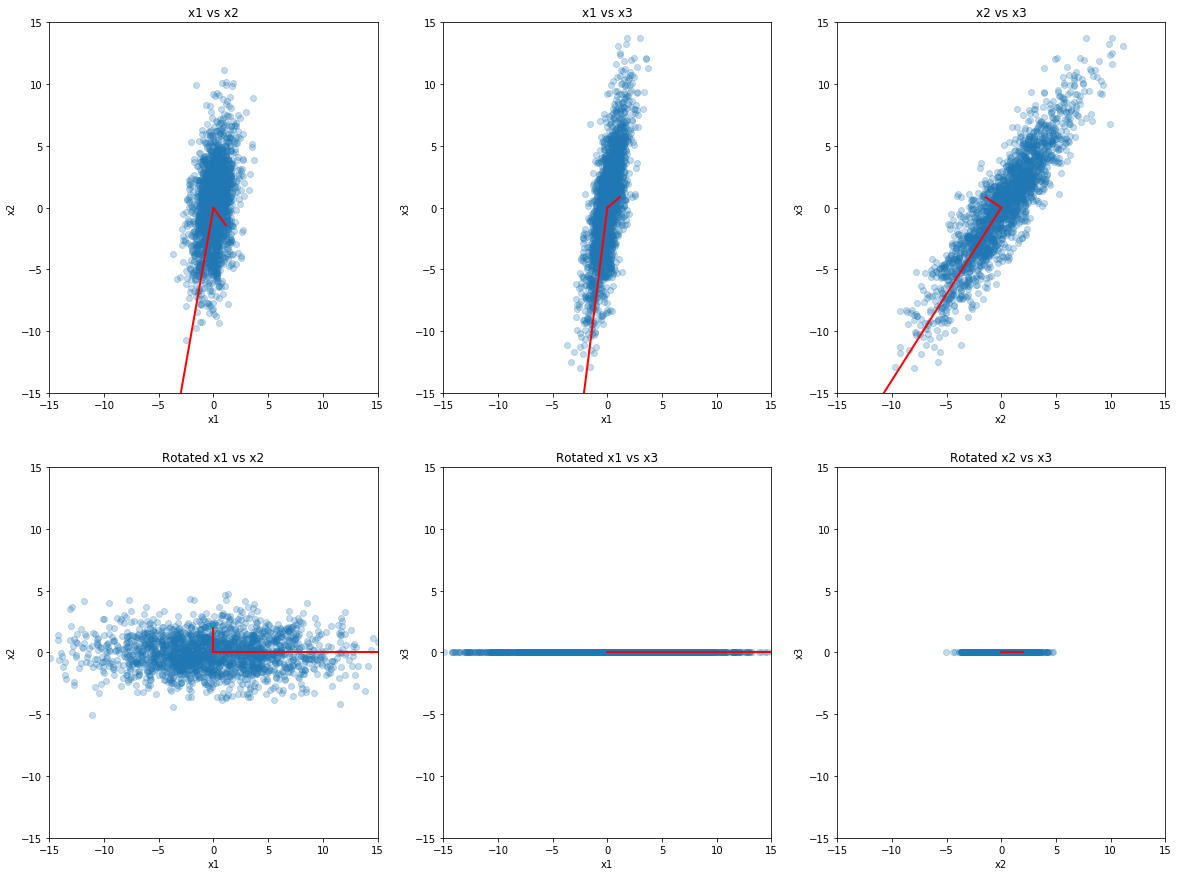

In [2]:
N = 2000

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

datas = {'x1': x1, 'x2': x2, 'x3': x3}
dat = pd.DataFrame(datas)

data = np.array([x1,x2,x3])

print('Covariance matrix:')
print(np.cov(data))

l, V = la.eig(np.cov(data))
print()
print('Eigenvalues:')
print(l)
print()
print('Eigenvectors:')
print(V)
print()
U, spectrum, Vt = la.svd(np.cov(data))

### the two procedures lead to the same result in two out of three cases; the smallest eigenvalue 
### is different. However, such diffference may be caused by the finite precision of the machine

print('Weight of first eigenvalue:', spectrum[0]/spectrum.sum())
print()
print('Weight of second eigenvalue:', spectrum[1]/spectrum.sum())
print()
print('Pricipal components (first two) weight:', (spectrum[1] + spectrum[0])/spectrum.sum())

### total variability is caused pretty much entirely by the first two components. Noting that 


thresh = 0.99
i=0
while (spectrum[:i].sum())/(spectrum.sum())<.99:
    i+=1
    
#eliminating superfluous components
spectrum[i:] = 0

data_rot = U.T.dot(data)

print("Printing rotated data:\n", data_rot, "\n")

# Deleting the "less significant" row
data_rot_thresh = data_rot[:i]    

print(data_rot_thresh)




#preparing the plots
fig = plt.figure(figsize=(20,15))

ax00 = plt.subplot2grid((2,3), (0,0))
ax01 = plt.subplot2grid((2,3), (0,1))
ax02 = plt.subplot2grid((2,3), (0,2))
ax10 = plt.subplot2grid((2,3), (1,0))
ax11 = plt.subplot2grid((2,3), (1,1))
ax12 = plt.subplot2grid((2,3), (1,2))

ax00.set_title('x1 vs x2')
ax01.set_title('x1 vs x3')
ax02.set_title('x2 vs x3')

ax00.scatter(data[0,:], data[1,:], alpha=0.25) 
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax00.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[1][0]], 'r-', lw=2)
ax00.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[1][1]], 'r-', lw=2)
ax00.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[1][2]], 'r-', lw=2)
ax00.set_ylabel("x2")
ax00.set_xlabel("x1")
ax00.axis([-15,15,-15,15]);


ax01.scatter(data[0,:], data[2,:], alpha=0.25)     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x3) plane
ax01.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax01.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax01.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax01.set_ylabel("x3")
ax01.set_xlabel("x1")
ax01.axis([-15,15,-15,15]);


ax02.scatter(data[1,:], data[2,:], alpha=0.25)     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x2,x3) plane
ax02.plot([0, spectrum[0]*U[1][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax02.plot([0, spectrum[1]*U[1][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax02.plot([0, spectrum[2]*U[1][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax02.set_ylabel("x3")
ax02.set_xlabel("x2")
ax02.axis([-15,15,-15,15]);


ax10.set_title('Rotated x1 vs x2')
ax11.set_title('Rotated x1 vs x3')
ax12.set_title('Rotated x2 vs x3')


ax10.scatter(data_rot[0,:], data_rot[1,:], alpha=0.25)     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) rotated plane

ax10.plot([0, spectrum[0]*1], [0, spectrum[0]*0], 'r-', lw=2)
ax10.plot([0, spectrum[1]*0], [0, spectrum[1]*1], 'r-', lw=2)
# the third eigenvector has null component on the projection over rotated x1 and x2

ax10.set_ylabel("x2")
ax10.set_xlabel("x1")
ax10.axis([-15,15,-15,15]);


ax11.scatter(data_rot[0,:], data_rot[2,:], alpha=0.25)     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x3) rotated plane

ax11.plot([0, spectrum[0]*1], [0, spectrum[0]*0], 'r-', lw=2)
# the second eigenvector has null component on the projection over rotated x1 and x2
ax11.plot([0, spectrum[2]*0], [0, spectrum[2]*1], 'r-', lw=2)

ax11.set_ylabel("x3")
ax11.set_xlabel("x1")
ax11.axis([-15,15,-15,15]);


ax12.scatter(data_rot[1,:], data_rot[2,:], alpha=0.25)     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x2,x3) rotated plane

# the first eigenvector has null component on the projection over rotated x1 and x2
ax12.plot([0, spectrum[1]*1], [0, spectrum[1]*0], 'r-', lw=2)
ax12.plot([0, spectrum[2]*0], [0, spectrum[2]*1], 'r-', lw=2)

ax12.set_ylabel("x3")
ax12.set_xlabel("x2")
ax12.axis([-15,15,-15,15]);

In [3]:
#data rotation
datar = pd.DataFrame({'x1_rot': data_rot[0,:],'x2_rot': data_rot[1,:],'x3_rot': data_rot[2,:]})
print("ROTATED DATA")
datar

ROTATED DATA


x1_rot    x2_rot        x3_rot
0     -2.727750  0.489491  5.551115e-16
1    -12.300202 -1.234885 -1.332268e-15
2     -7.661277  1.410145  1.776357e-15
3     -1.296468 -0.437724 -3.330669e-16
4      3.613959  1.528609  1.554312e-15
5      2.022512  1.186684  1.110223e-15
6      4.635297  1.768772  1.554312e-15
7      4.631496 -0.408041 -6.661338e-16
8     -4.494190 -0.396157 -2.220446e-16
9     -2.234106  0.458051  5.551115e-16
10    -0.197089 -1.241972 -1.276756e-15
11    -4.738877 -1.715174 -1.332268e-15
12    -8.347741  0.300796  4.440892e-16
13    -6.478028  0.435587  8.881784e-16
14    -5.126033  0.925815  1.110223e-15
15    11.434801 -2.049639 -3.552714e-15
16    -2.040143 -0.144157 -1.110223e-16
17    -1.964080 -0.838869 -7.771561e-16
18     2.428220 -2.308916 -2.220446e-15
19     2.672382  0.742147  6.661338e-16
20     7.144473 -0.378161  0.000000e+00
21     0.263395  0.539453  5.143455e-16
22     3.495889  1.141433  8.881784e-16
23    -8.211724  3.057751  3.108624e-15
24     1.542950 -0.838036 -8.881784e-16
25    -5.662796  0.636057  8.881784e-16
26    10.699159  2.151568  1.776357e-15
27     9.642039  0.060042 -4.440892e-16
28     0.096916 -1.427768 -1.443290e-15
29     4.302208 -0.389710 -4.440892e-16
...         ...       ...           ...
1970   2.615704 -0.875679 -1.110223e-15
1971  -3.485009 -0.620878 -6.661338e-16
1972  -1.193029 -0.905703 -8.881784e-16
1973   7.758738 -1.105872 -1.332268e-15
1974  -2.986063 -2.508788 -2.220446e-15
1975  -4.572924  1.401724  1.332268e-15
1976   0.103690  0.671525  6.106227e-16
1977   7.531353  2.280540  2.220446e-15
1978   1.473086 -0.130545 -1.110223e-16
1979   6.324245 -0.154282 -4.440892e-16
1980   6.200043  0.050700 -4.440892e-16
1981   1.072100 -0.769386 -7.771561e-16
1982   1.322710  2.056856  1.915135e-15
1983   0.135402  0.628915  5.967449e-16
1984  -4.497005 -1.145974 -8.881784e-16
1985  -7.750817  1.317547  1.776357e-15
1986   1.410951  2.632242  2.501471e-15
1987  -5.272089 -0.516098 -2.220446e-16
1988  -2.274535  0.015103  2.220446e-16
1989   5.504200 -1.485836 -1.776357e-15
1990  -1.154415  0.556595  6.106227e-16
1991   4.012346 -0.042604 -2.220446e-16
1992   1.598169 -1.002224 -1.221245e-15
1993   5.730773  0.126734 -2.220446e-16
1994  -4.446266  0.625114  4.440892e-16
1995   0.349494 -0.834535 -7.771561e-16
1996   3.188822  0.676389  5.551115e-16
1997  -9.531636  3.975308  4.884981e-15
1998  -2.542680  0.712648  8.881784e-16
1999   6.811157  0.984394  4.440892e-16

[2000 rows x 3 columns]

In [4]:
dataclean = pd.DataFrame({'x1_rot': data_rot[0,:],'x2_rot': data_rot[1,:]})
print("CLEAN DATA")
pd.DataFrame(dataclean)

CLEAN DATA


x1_rot    x2_rot
0     -2.727750  0.489491
1    -12.300202 -1.234885
2     -7.661277  1.410145
3     -1.296468 -0.437724
4      3.613959  1.528609
5      2.022512  1.186684
6      4.635297  1.768772
7      4.631496 -0.408041
8     -4.494190 -0.396157
9     -2.234106  0.458051
10    -0.197089 -1.241972
11    -4.738877 -1.715174
12    -8.347741  0.300796
13    -6.478028  0.435587
14    -5.126033  0.925815
15    11.434801 -2.049639
16    -2.040143 -0.144157
17    -1.964080 -0.838869
18     2.428220 -2.308916
19     2.672382  0.742147
20     7.144473 -0.378161
21     0.263395  0.539453
22     3.495889  1.141433
23    -8.211724  3.057751
24     1.542950 -0.838036
25    -5.662796  0.636057
26    10.699159  2.151568
27     9.642039  0.060042
28     0.096916 -1.427768
29     4.302208 -0.389710
...         ...       ...
1970   2.615704 -0.875679
1971  -3.485009 -0.620878
1972  -1.193029 -0.905703
1973   7.758738 -1.105872
1974  -2.986063 -2.508788
1975  -4.572924  1.401724
1976   0.103690  0.671525
1977   7.531353  2.280540
1978   1.473086 -0.130545
1979   6.324245 -0.154282
1980   6.200043  0.050700
1981   1.072100 -0.769386
1982   1.322710  2.056856
1983   0.135402  0.628915
1984  -4.497005 -1.145974
1985  -7.750817  1.317547
1986   1.410951  2.632242
1987  -5.272089 -0.516098
1988  -2.274535  0.015103
1989   5.504200 -1.485836
1990  -1.154415  0.556595
1991   4.012346 -0.042604
1992   1.598169 -1.002224
1993   5.730773  0.126734
1994  -4.446266  0.625114
1995   0.349494 -0.834535
1996   3.188822  0.676389
1997  -9.531636  3.975308
1998  -2.542680  0.712648
1999   6.811157  0.984394

[2000 rows x 2 columns]

Text(0.5,0.98,'Paired plots of unrotated data')

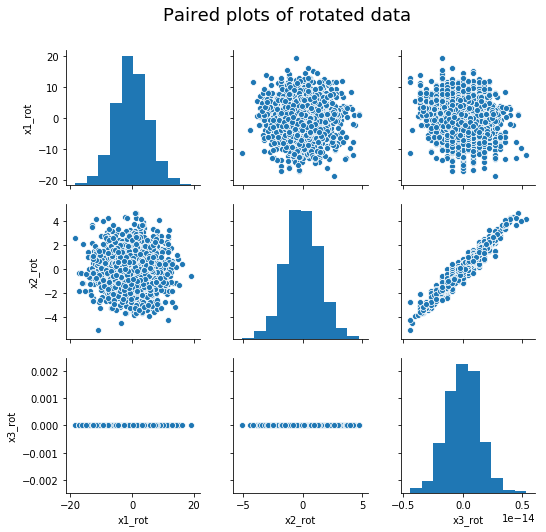

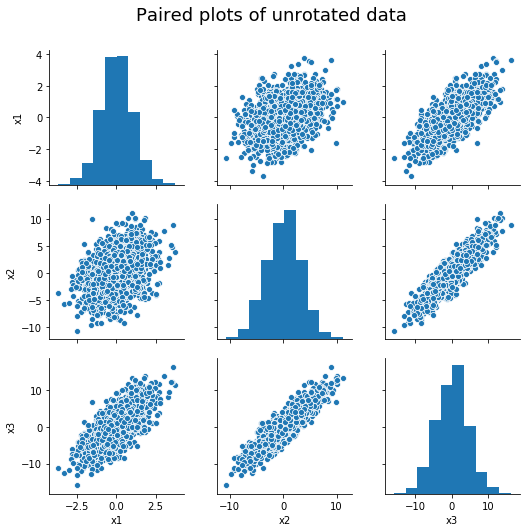

In [5]:
g = sns.pairplot(datar)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Paired plots of rotated data', fontsize=18)


a = sns.pairplot(dat)
plt.subplots_adjust(top=0.9)
a.fig.suptitle('Paired plots of unrotated data', fontsize=18)

2\. **PCA on a nD dataset**

Start from the dataset you have generated in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standard deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before


Eigenvalues:
[ 2.90167723e+01+0.j  1.98591426e+00+0.j -2.90546767e-15+0.j
  3.47849356e-04+0.j  4.52787143e-04+0.j  3.66283123e-04+0.j
  4.35197372e-04+0.j  4.23385843e-04+0.j  4.18680627e-04+0.j
  3.85445984e-04+0.j  3.89332765e-04+0.j  4.02498953e-04+0.j
  4.04392269e-04+0.j]

Eigenvectors:
[[-1.14962991e-01 -5.65788230e-01  8.16496581e-01  1.99190511e-04
   2.43954515e-04 -2.13748910e-04  1.64882953e-04 -2.40139037e-04
  -3.16838603e-04 -3.78171726e-04 -1.73648324e-04  1.30586865e-04
   5.45155946e-05]
 [-5.77983777e-01  7.06588501e-01  4.08248290e-01 -1.60358369e-04
  -3.78482695e-04  3.20825729e-04 -1.86420767e-04  2.46412672e-04
   3.69969197e-04  4.60053226e-04  7.39787596e-05 -2.01070729e-04
  -1.25954092e-04]
 [-8.07909758e-01 -4.24987959e-01 -4.08248290e-01  2.38022653e-04
   1.09426336e-04 -1.06672091e-04  1.43345140e-04 -2.33865402e-04
  -2.63708010e-04 -2.96290227e-04 -2.73317889e-04  6.01030012e-05
  -1.69229029e-05]
 [-7.82984401e-05  3.26519753e-04 -4.57618092e-15  2.0

Text(0.5,0.98,'Paired plots of rotated data')

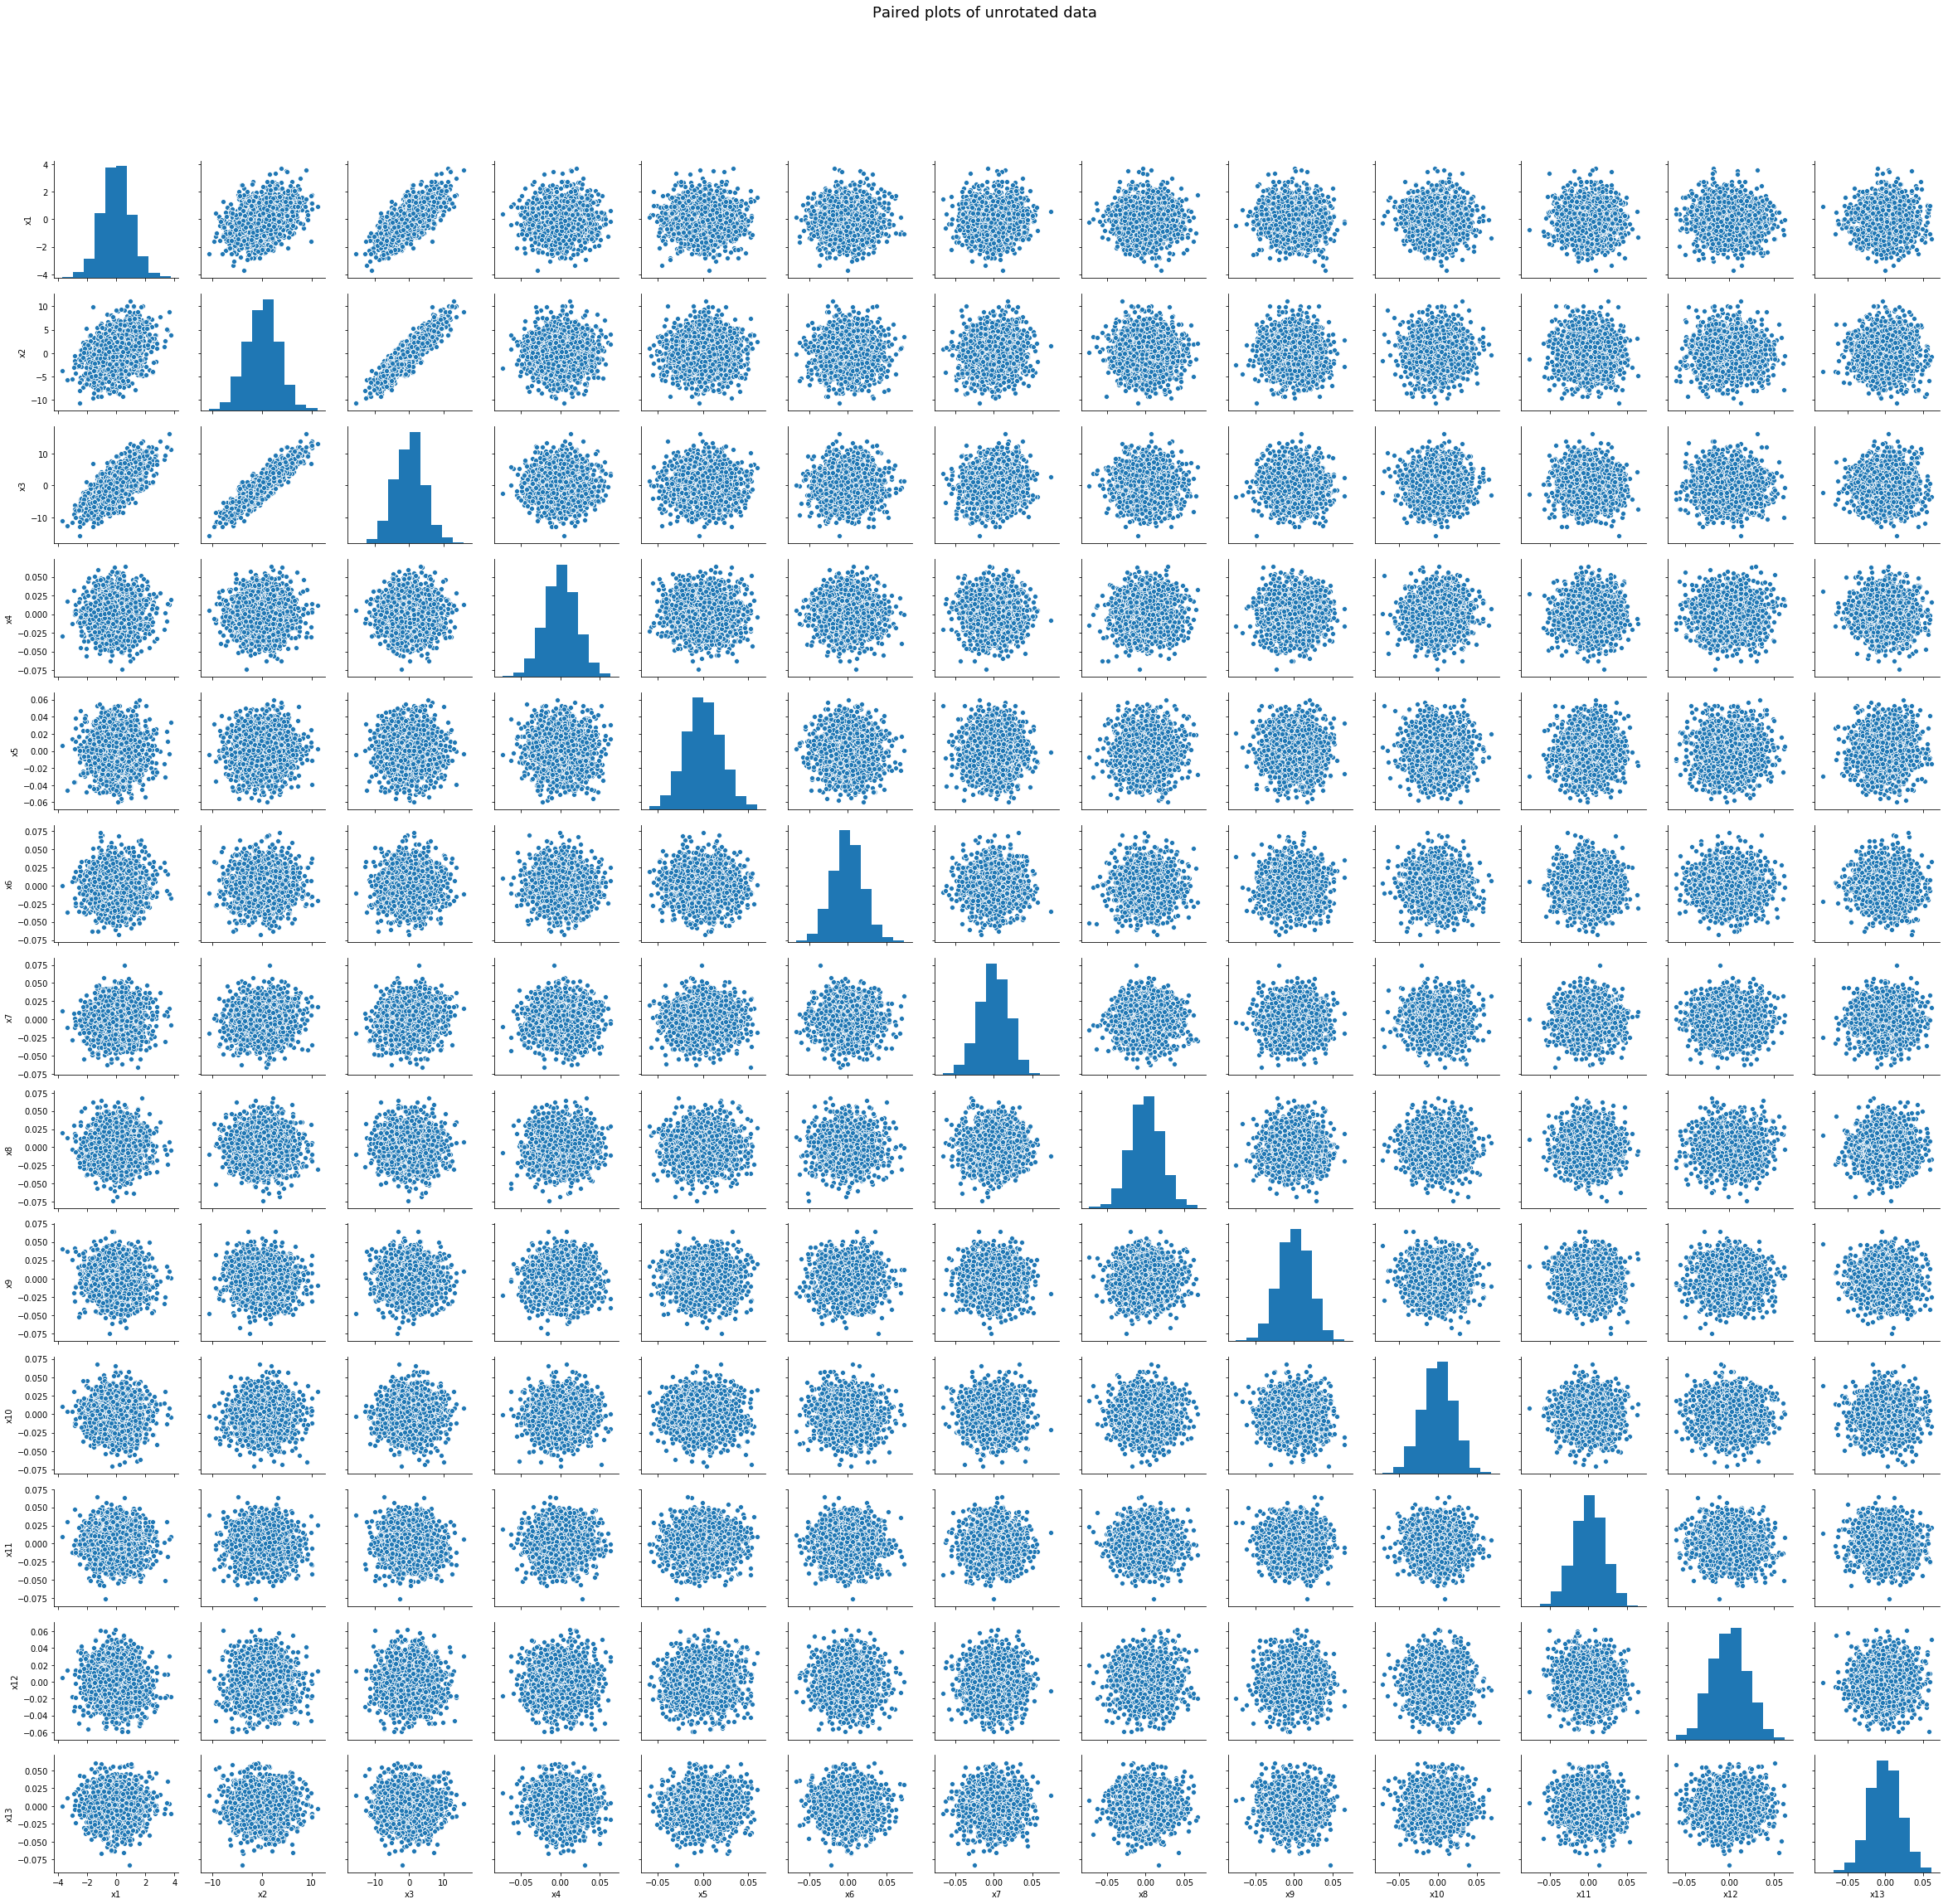

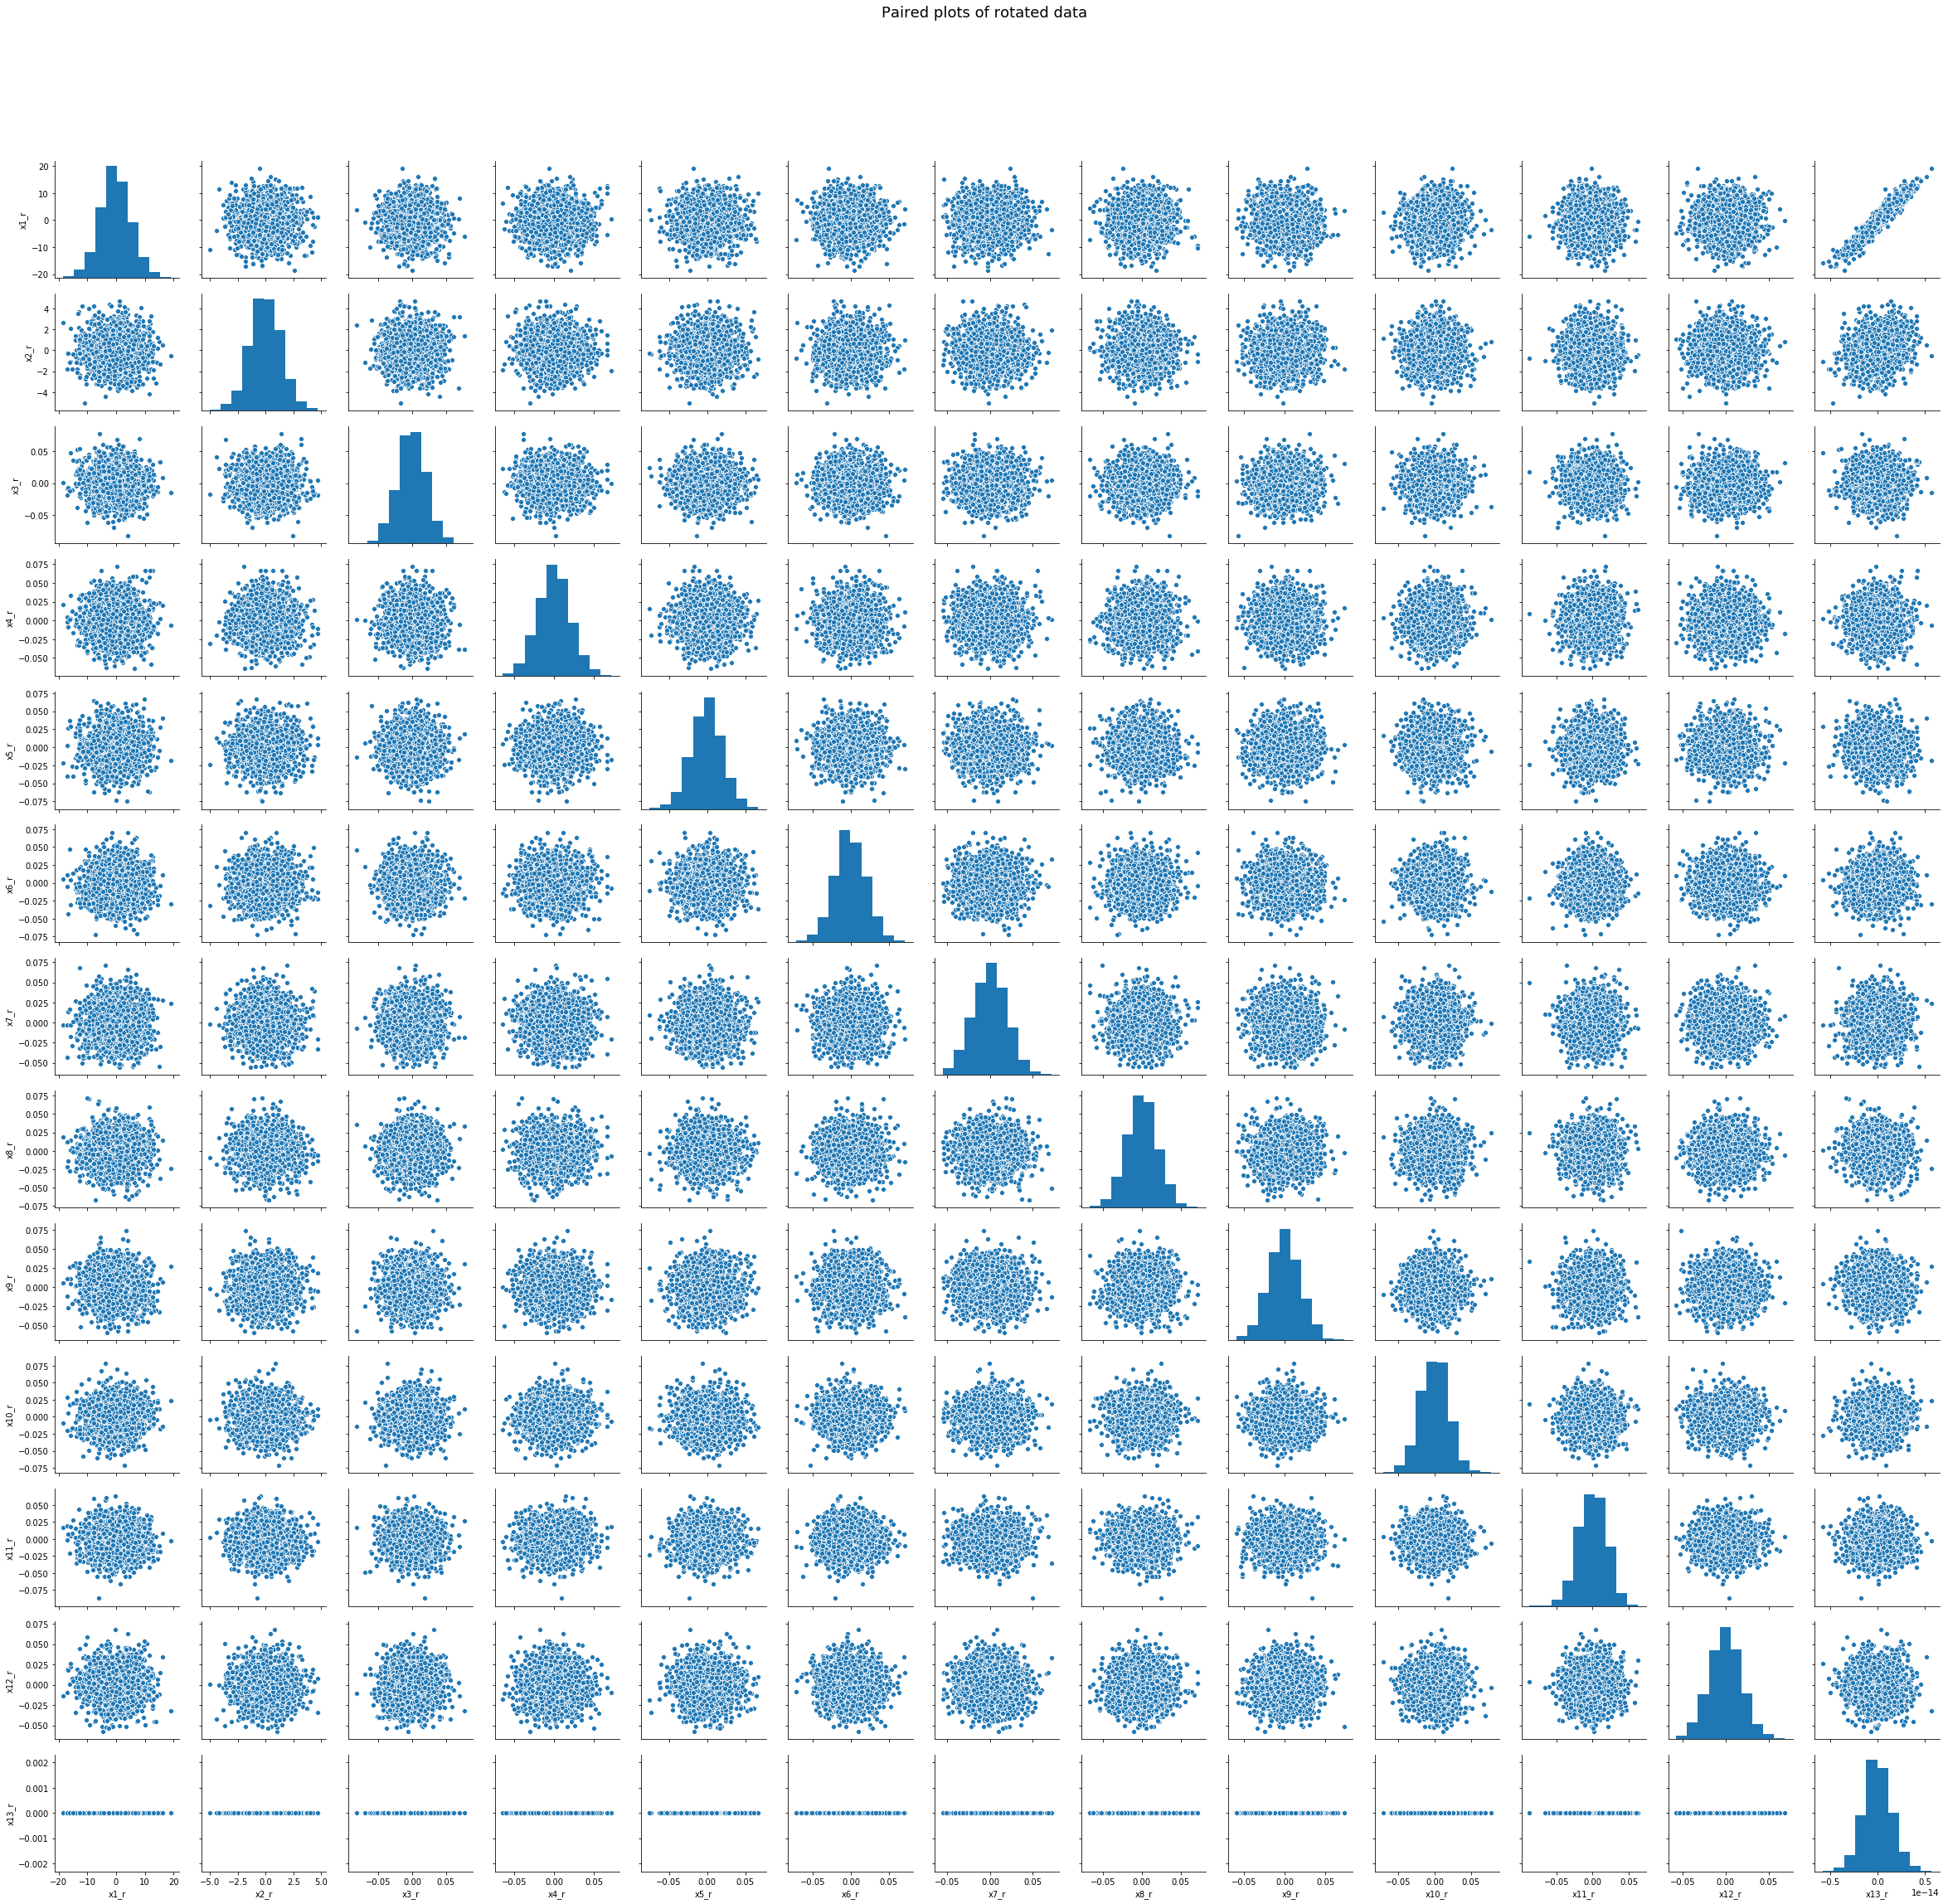

In [6]:
sigma = 1/50


x4 = np.random.normal(0,sigma,N)
x5 = np.random.normal(0,sigma,N)
x6 = np.random.normal(0,sigma,N)
x7 = np.random.normal(0,sigma,N)
x8 = np.random.normal(0,sigma,N)
x9 = np.random.normal(0,sigma,N)
x10 = np.random.normal(0,sigma,N)
x11 = np.random.normal(0,sigma,N)
x12 = np.random.normal(0,sigma,N)
x13 = np.random.normal(0,sigma,N)


data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13])



#print('Covariance matrix:')
#print(np.cov(data))

l, V = la.eig(np.cov(data))
print()
print('Eigenvalues:')
print(l)
print()
print('Eigenvectors:')
print(V)
print()
U, spectrum, Vt = la.svd(np.cov(data))

thresh = 0.99
i=0
while (spectrum[:i].sum())/(spectrum.sum())<.99:
    i+=1
    
print("The threshold is reached by summing the first ", i, "eigenvalues.\n")

#data rotation
datar = np.dot(Vt, data)
pd.DataFrame(datar)


dataclean = datar[:i]

pd.DataFrame(dataclean)

datarot = pd.DataFrame({'x1_r':datar[0,:],
                       'x2_r':datar[1,:],
                       'x3_r':datar[2,:],
                       'x4_r':datar[3,:],
                       'x5_r':datar[4,:],
                       'x6_r':datar[5,:],
                       'x7_r':datar[6,:],
                       'x8_r':datar[7,:],
                       'x9_r':datar[8,:],
                       'x10_r':datar[9,:],
                       'x11_r':datar[10,:],
                       'x12_r':datar[11,:],
                       'x13_r':datar[12,:],})

dat = pd.DataFrame({'x1':data[0,:],
                       'x2':data[1,:],
                       'x3':data[2,:],
                       'x4':data[3,:],
                       'x5':data[4,:],
                       'x6':data[5,:],
                       'x7':data[6,:],
                       'x8':data[7,:],
                       'x9':data[8,:],
                       'x10':data[9,:],
                       'x11':data[10,:],
                       'x12':data[11,:],
                       'x13':data[12,:],})


a = sns.pairplot(dat)
plt.subplots_adjust(top=0.9)
a.fig.suptitle('Paired plots of unrotated data', fontsize=18)


g = sns.pairplot(datarot)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Paired plots of rotated data', fontsize=18)


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [ ]:
def rotation(r, theta, phi):
    a = r
    a[0] = np.absolute(r)*np.cos(phi)*np.sin(theta)
    a[1] = np.absolute(r)*np.sin(phi)*np.sin(theta)
    a[2] = np.absolute(r)*np.cos(theta)
    return a

    
n = 5 #number of cameras
N = 1000 #number of recordings

#simulation of spring -> harmonic oscillator with brownian noise
    
    
    
    
    

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset